# Segmentación de Clientes y Análisis de Características con Machine Learning

Este proyecto tiene como objetivo principal segmentar a los clientes basándose en sus patrones de comportamiento y características crediticias, utilizando técnicas de machine learning para identificar grupos distintos y entender sus perfiles.

# Diccionario de Datos - Dataset de Marketing

A continuación, se presenta una descripción de cada columna en el dataset:

| Columna                            | Descripción                                                                                                | Tipo de Dato |
|------------------------------------|------------------------------------------------------------------------------------------------------------|--------------|
| `CUST_ID`                          | Identificador único del cliente. No es útil para el análisis de segmentación.                              | Object       |
| `BALANCE`                          | Saldo actual en la cuenta de crédito. Un saldo alto podría indicar un uso extensivo del crédito.             | Float        |
| `BALANCE_FREQUENCY`                | Frecuencia de actualización del saldo (0 a 1, donde 1 es actualizado a menudo).                            | Float        |
| `PURCHASES`                        | Cantidad total de compras realizadas. Esto nos da una idea del nivel de actividad de compra del cliente.     | Float        |
| `ONEOFF_PURCHASES`                 | Cantidad de compras realizadas de una sola vez, no a plazos.                                               | Float        |
| `INSTALLMENTS_PURCHASES`           | Cantidad de compras realizadas a plazos.                                                                   | Float        |
| `CASH_ADVANCE`                     | Cantidad total de anticipos en efectivo realizados. Esto puede indicar una necesidad de liquidez.            | Float        |
| `PURCHASES_FREQUENCY`              | Frecuencia de compras (0 a 1, donde 1 es comprado a menudo).                                               | Float        |
| `ONEOFF_PURCHASES_FREQUENCY`       | Frecuencia de compras de una sola vez (0 a 1).                                                             | Float        |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Frecuencia de compras a plazos (0 a 1).                                                                    | Float        |
| `CASH_ADVANCE_FREQUENCY`           | Frecuencia de anticipos en efectivo (0 a 1).                                                               | Float        |
| `CASH_ADVANCE_TRX`                 | Número de transacciones de anticipo en efectivo.                                                           | Integer      |
| `PURCHASES_TRX`                    | Número de transacciones de compra.                                                                         | Integer      |
| `CREDIT_LIMIT`                     | Límite de crédito de la tarjeta.                                                                           | Float        |
| `PAYMENTS`                         | Cantidad total de pagos realizados.                                                                        | Float        |
| `MINIMUM_PAYMENTS`                 | Cantidad mínima total de pagos debidos.                                                                    | Float        |
| `PRC_FULL_PAYMENT`                 | Porcentaje del pago total pagado en su totalidad. Un valor cercano a 1 indica que el cliente paga el total. | Float        |
| `TENURE`                           | Período de tenencia del servicio de crédito en meses.                                                      | Integer      |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## 1. Análisis Exploratorio de Datos (EDA)
En esta sección, realizaremos un análisis inicial para comprender la estructura de los datos, identificar patrones, valores atípicos y visualizar relaciones entre las variables.

In [2]:
url='https://raw.githubusercontent.com/AndreLir/MyDatasets/refs/heads/main/DataSet/DataMarketing.csv'
df=pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Eliminamos la columna CUST_Id pues es irrelevante
df.drop('CUST_ID', axis=1, inplace=True)

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Axes: >

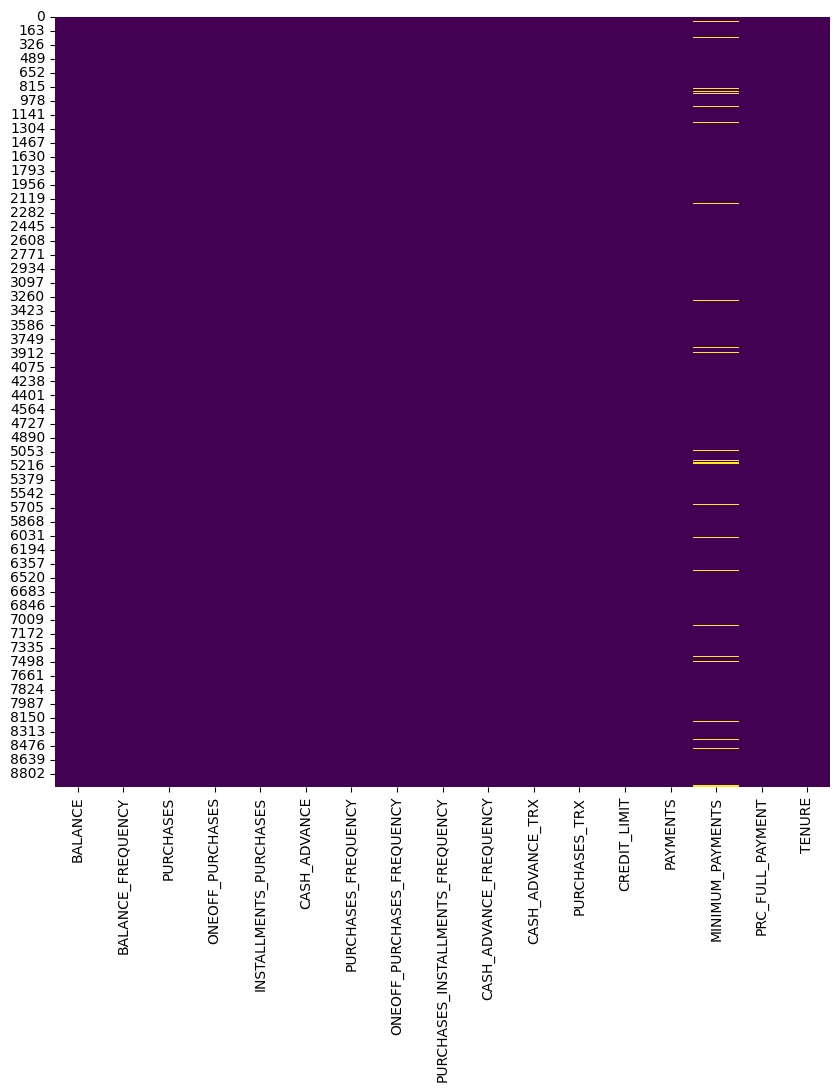

In [5]:
dataNula=df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(dataNula, cbar=False, cmap='viridis')

In [6]:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [7]:
# LOS PAGOS MINIMOS QUE PRESENTAN VALORES NULOS SERAN REEMPLAZADOS POR LA MEDIA
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
# REEMPLAZAR EL VALOR NULO EN CREDIT_LIMIT CON LA MEDIA
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

<Axes: >

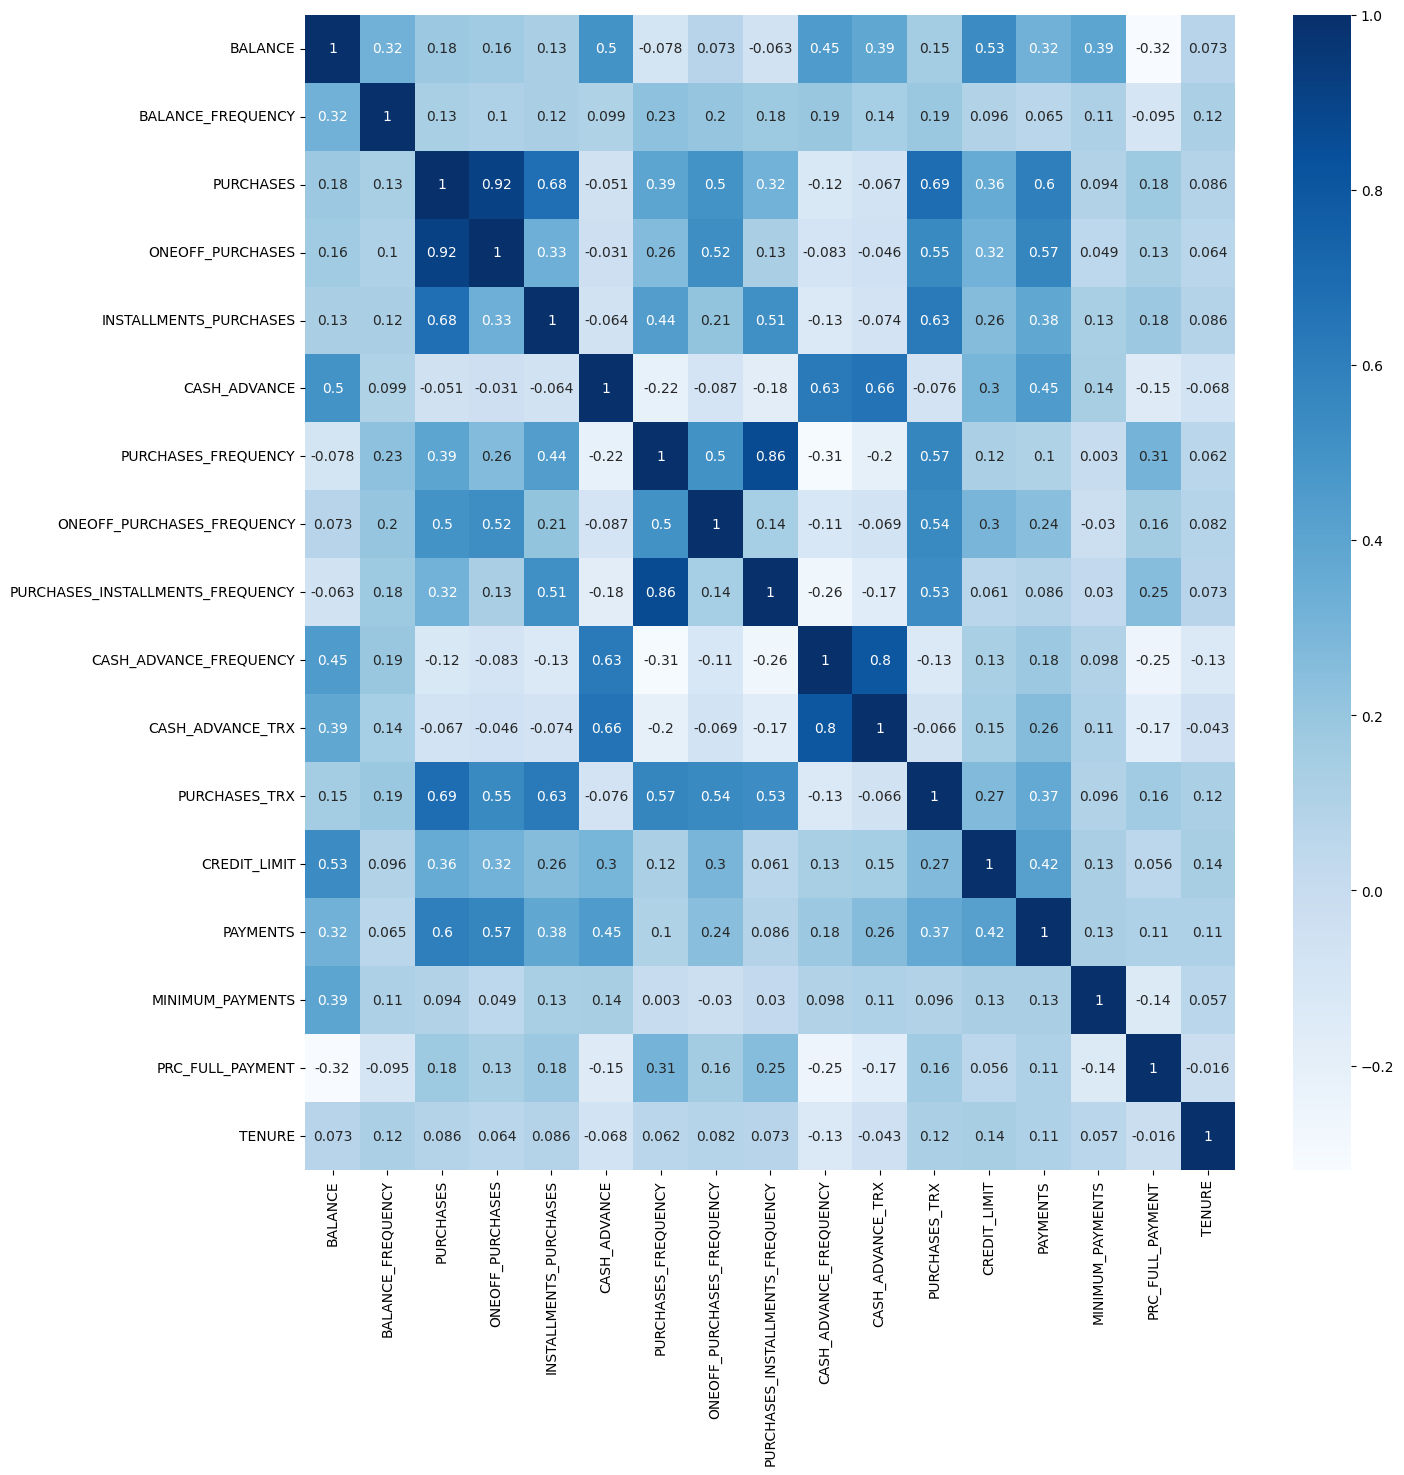

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [10]:
import itertools

def corrank(df):
    # calcular correlaciones numéricas
    df_corr = df.corr(numeric_only=True)

    # generar pares de columnas y sus correlaciones
    df_corr_pairs = pd.DataFrame(
        [[(i, j), df_corr.loc[i, j]] for i, j in itertools.combinations(df_corr.columns, 2)],
        columns=['pairs', 'corr']
    )

    # devolver el dataframe ordenado
    return df_corr_pairs.sort_values(by='corr', ascending=False).reset_index(drop=True)

# usar la función
dfrk = corrank(df)

# mostrar los 25 pares más correlacionados
print(dfrk.head(25))



                                                pairs      corr
0                       (PURCHASES, ONEOFF_PURCHASES)  0.916845
1   (PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_F...  0.862934
2          (CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX)  0.799561
3                          (PURCHASES, PURCHASES_TRX)  0.689561
4                 (PURCHASES, INSTALLMENTS_PURCHASES)  0.679896
5                    (CASH_ADVANCE, CASH_ADVANCE_TRX)  0.656498
6              (CASH_ADVANCE, CASH_ADVANCE_FREQUENCY)  0.628522
7             (INSTALLMENTS_PURCHASES, PURCHASES_TRX)  0.628108
8                               (PURCHASES, PAYMENTS)  0.603264
9                (PURCHASES_FREQUENCY, PURCHASES_TRX)  0.568430
10                       (ONEOFF_PURCHASES, PAYMENTS)  0.567292
11                  (ONEOFF_PURCHASES, PURCHASES_TRX)  0.545523
12        (ONEOFF_PURCHASES_FREQUENCY, PURCHASES_TRX)  0.544869
13                            (BALANCE, CREDIT_LIMIT)  0.531267
14  (PURCHASES_INSTALLMENTS_FREQUENCY, P

### 2. Visualizacion de Datos
Aquí prepararemos los datos para el modelado, incluyendo el manejo de valores faltantes, codificación de variables categóricas, escalado de características, etc.

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

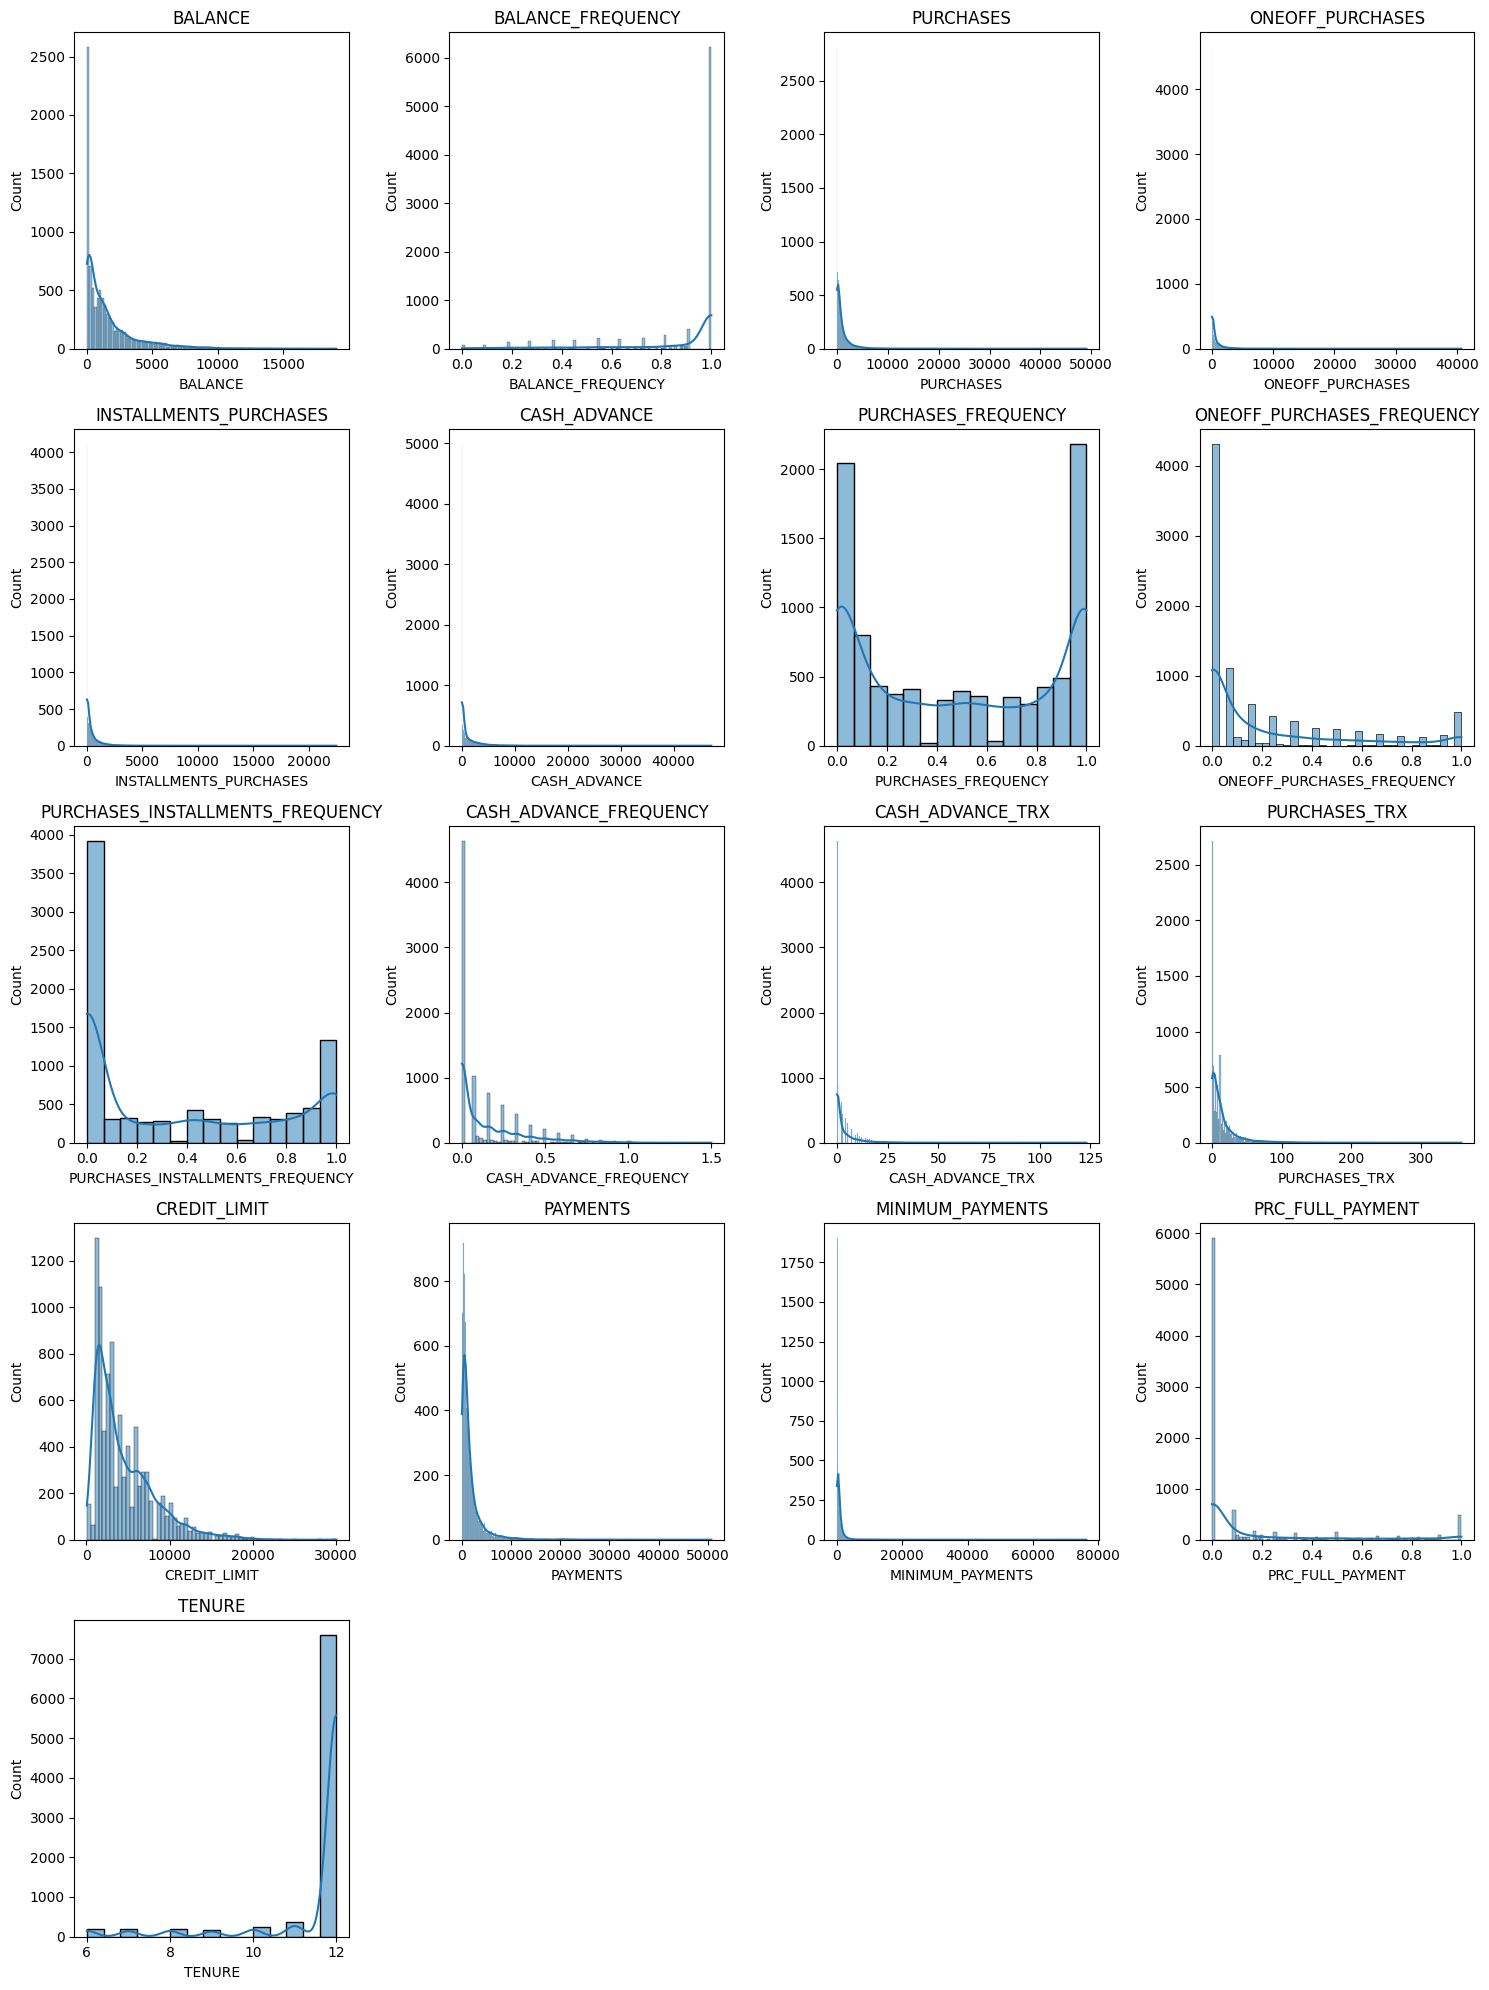

In [12]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols # Calculate number of rows needed
plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Resumen de la Distribución de Variables

Los histogramas nos permiten observar la distribución de cada una de las variables en el dataset. Aquí destacamos algunos puntos importantes:

*   **Variables con Distribución Sesgada:** Varias variables presentan distribuciones sesgadas hacia la derecha, lo que indica la presencia de valores atípicos o una concentración de datos en los valores más bajos. Ejemplos notables incluyen `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, y `MINIMUM_PAYMENTS`. Esto sugiere que la mayoría de los clientes tienen valores bajos en estas métricas, mientras que un menor número de clientes presenta valores significativamente más altos.

*   **Variables con Distribución más Uniforme o Bimodal:** Algunas variables como `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, y `PRC_FULL_PAYMENT` muestran distribuciones más uniformes o incluso bimodales (con picos en los extremos 0 y 1). Esto puede indicar distintos grupos de comportamiento en los clientes, por ejemplo, aquellos que usan el crédito con alta frecuencia versus aquellos que lo usan con baja frecuencia o no lo usan.

*   **Variables con Distribución Concentrada:** `BALANCE_FREQUENCY` muestra una alta concentración en 1.0, lo que significa que el saldo de la mayoría de los clientes se actualiza con mucha frecuencia. `TENURE` también muestra una alta concentración en 12, indicando que la mayoría de los clientes han tenido el servicio por 12 meses.

*   **Variables con Distribución Discreta:** `CASH_ADVANCE_TRX` y `PURCHASES_TRX` son variables de conteo y sus histogramas reflejan la naturaleza discreta de los datos, con la mayoría de los clientes teniendo un número bajo de transacciones.

Comprender estas distribuciones es crucial para el preprocesamiento de datos, ya que las variables sesgadas pueden requerir transformaciones (como la aplicación de logaritmo) para mejorar el rendimiento de algunos algoritmos de machine learning.

## Analisis bivariado
para enteder la data es importantes conocer como se relacionan las varaibles de nuestro dataset

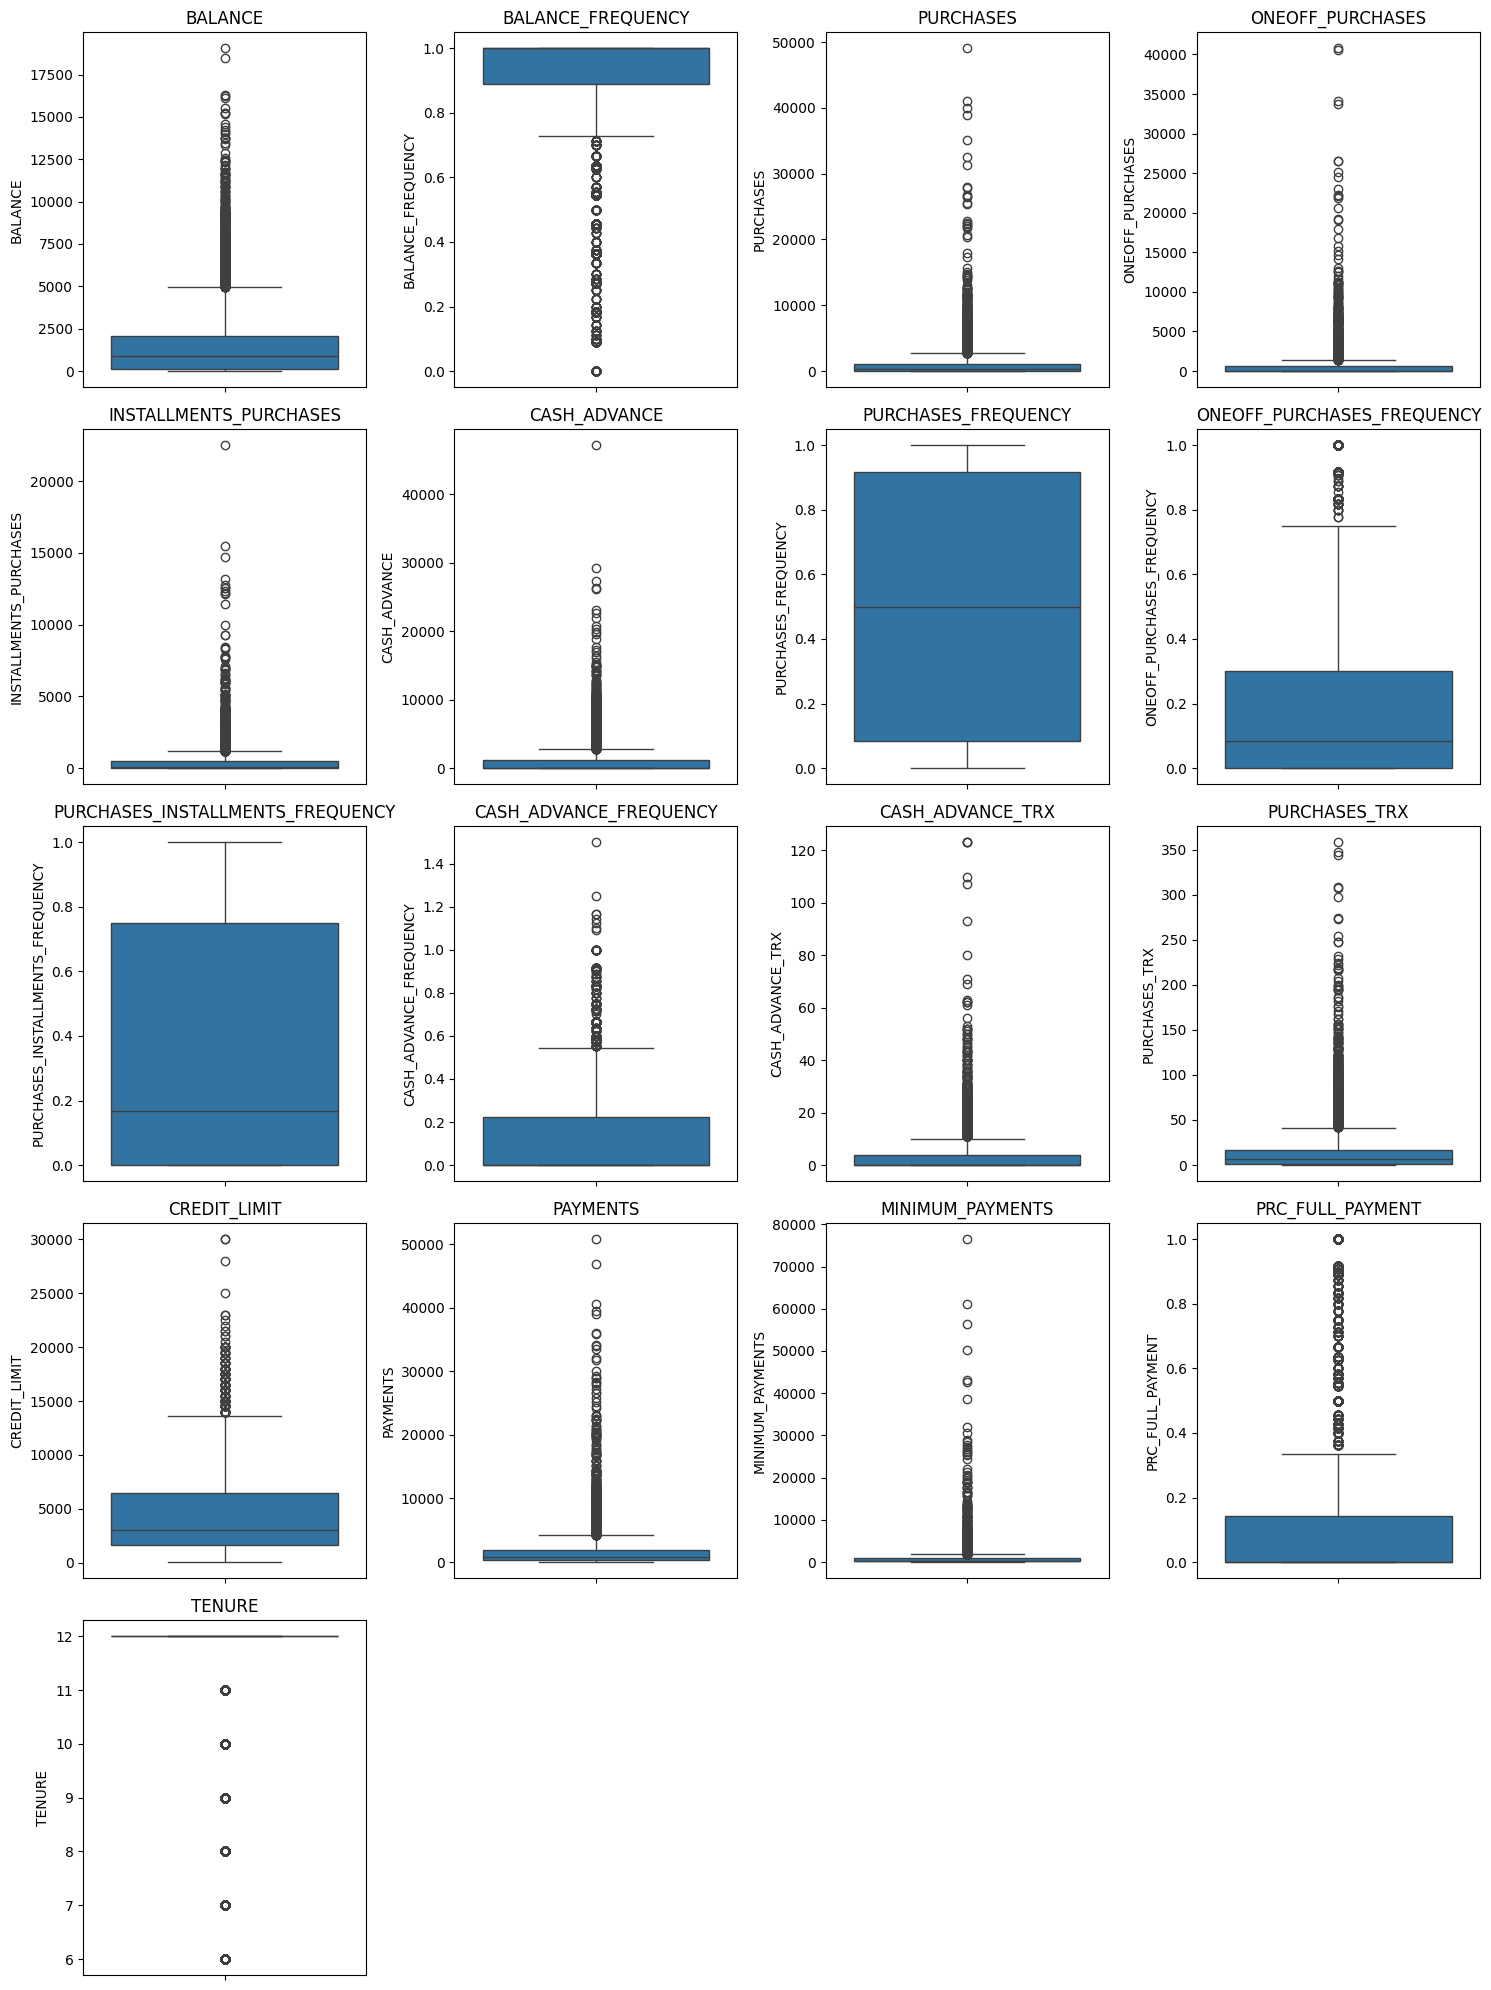

In [13]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols # Calculate number of rows needed
plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Conclusión del Análisis de Diagramas de Caja

Los diagramas de caja (box plots) nos proporcionan una excelente visualización de la distribución de cada variable, incluyendo la mediana, los cuartiles y la presencia de valores atípicos (outliers). Aquí destacamos algunas conclusiones importantes:

*   **Presencia Significativa de Outliers:** Un hallazgo consistente en la mayoría de las variables es la presencia de un número significativo de valores atípicos, especialmente en variables como `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, y `MINIMUM_PAYMENTS`. Esto confirma lo observado en los histogramas sesgados e indica que hay clientes con comportamientos de gasto y crédito excepcionalmente altos en comparación con la mayoría.
*   **Distribución de la Mediana y Cuartiles:** Los diagramas de caja muestran claramente la mediana (la línea central en la caja) y la dispersión de los datos entre el primer y tercer cuartil (la caja misma). Esto nos da una idea de dónde se concentra la mayoría de los datos para cada variable. Por ejemplo, en variables como `PURCHASES_FREQUENCY` y `PURCHASES_INSTALLMENTS_FREQUENCY`, la mediana está más cerca de los valores altos, mientras que en otras como `CASH_ADVANCE_FREQUENCY`, está más cerca de cero.
*   **Rango Intercuartílico (IQR):** La longitud de la caja (IQR) varía entre las variables, lo que nos indica la dispersión de los datos centrales. Variables con un IQR más amplio (`BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, `PAYMENTS`) muestran una mayor variabilidad en el comportamiento de la mayoría de los clientes, mientras que variables con un IQR más estrecho (`BALANCE_FREQUENCY`, `TENURE`) tienen datos más concentrados.
*   **Distribuciones Sesgadas Evidentes:** La posición de la mediana dentro de la caja y la longitud de los "bigotes" (líneas que se extienden desde la caja) reafirman la presencia de distribuciones sesgadas, especialmente en las variables mencionadas con alta cantidad de outliers.

La identificación de estos outliers es crucial para las siguientes etapas del preprocesamiento de datos, ya que pueden influir en el rendimiento de algunos algoritmos de machine learning. Dependiendo del algoritmo a utilizar, podríamos considerar estrategias para manejar estos valores atípicos, como la transformación logarítmica o la winsorización.

In [14]:
#Aplicamos StandarScarler debido a la alta presencia de outliers es un escalado mas efectivo.
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas para escalar (excluyendo CUST_ID si aún estuviera)
# Como ya eliminamos CUST_ID, escalaremos todas las columnas restantes
numerical_cols = df.columns.tolist()

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df_scaled = scaler.fit_transform(df[numerical_cols])

# Convertir el resultado de nuevo a un DataFrame (opcional, pero útil para visualización o pasos posteriores)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

display(df_scaled.head())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


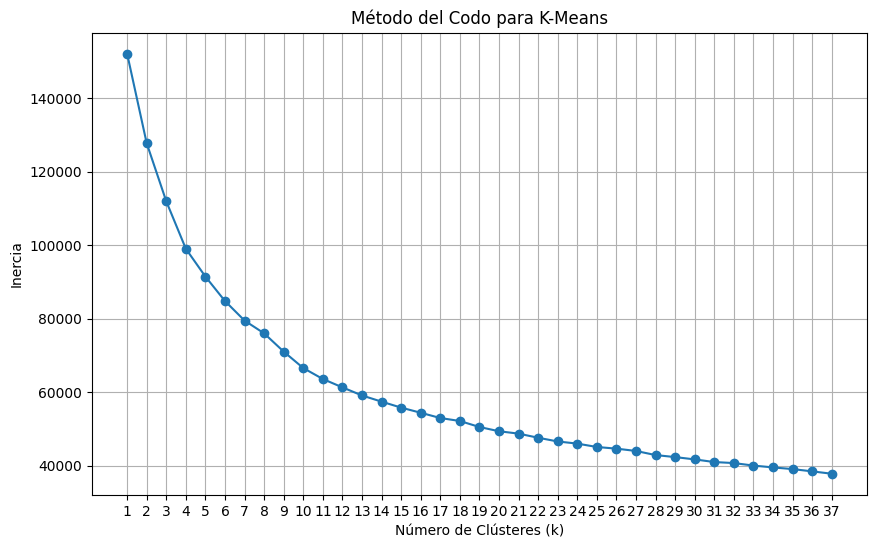

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Usaremos los datos escalados
data_for_clustering = df_scaled

# Lista para almacenar los valores de inercia
inertia = []

# Rango de número de clústeres a probar (por ejemplo, de 1 a 10)
k_range = range(1, 38)

# Calcular la inercia para cada número de clústeres
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [16]:
# Aplicar K-Means con k=6
kmeans_model = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_model.fit(df_scaled)

# Añadir las etiquetas de clúster al DataFrame escalado
df_scaled['Cluster_KMeans'] = kmeans_model.labels_

# También puedes añadir las etiquetas al DataFrame original si lo necesitas para análisis no escalados
# df['Cluster_KMeans'] = kmeans_model.labels_

display(df_scaled.head())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_KMeans
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,5
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,2


## Evaluación de Modelos de Clustering

Para evaluar la calidad de los modelos de clustering K-Means y DBSCAN, utilizaremos métricas de validación interna. A diferencia de la validación cruzada en aprendizaje supervisado, estas métricas nos ayudan a entender qué tan bien estructurados y separados están los clústeres basándonos únicamente en los datos y los resultados del clustering.

Evaluaremos los modelos utilizando las siguientes métricas:

*   **Silhouette Score:** Mide qué tan similar es cada punto a su propio clúster en comparación con otros clústeres. Un valor más alto (cercano a 1) indica clústeres densos y bien separados.
*   **Davies-Bouldin Index:** Mide la similitud promedio entre clústeres. Un valor más bajo indica que los clústeres son más disímiles y están mejor separados.
*   **Calinski-Harabasz Index:** Mide la relación entre la dispersión entre clústeres y la dispersión dentro de los clústeres. Un valor más alto sugiere clústeres densos y bien separados.

Aplicaremos K-Means y DBSCAN a los datos escalados (`df_scaled`), calcularemos estas métricas para cada modelo y compararemos los resultados para tener una idea de cuál algoritmo parece ajustarse mejor a la estructura de nuestros datos para la segmentación de clientes.

In [17]:
# Calcular Silhouette Score
silhouette_avg = silhouette_score(df_scaled.drop('Cluster_KMeans', axis=1), kmeans_model.labels_)
print(f'Silhouette Score para K-Means (k=7): {silhouette_avg:.4f}')

# Calcular Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(df_scaled.drop('Cluster_KMeans', axis=1), kmeans_model.labels_)
print(f'Davies-Bouldin Index para K-Means (k=7): {davies_bouldin_avg:.4f}')

# Calcular Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(df_scaled.drop('Cluster_KMeans', axis=1), kmeans_model.labels_)
print(f'Calinski-Harabasz Index para K-Means (k=7): {calinski_harabasz_avg:.4f}')

Silhouette Score para K-Means (k=7): 0.2026
Davies-Bouldin Index para K-Means (k=7): 1.5075
Calinski-Harabasz Index para K-Means (k=7): 1418.7179


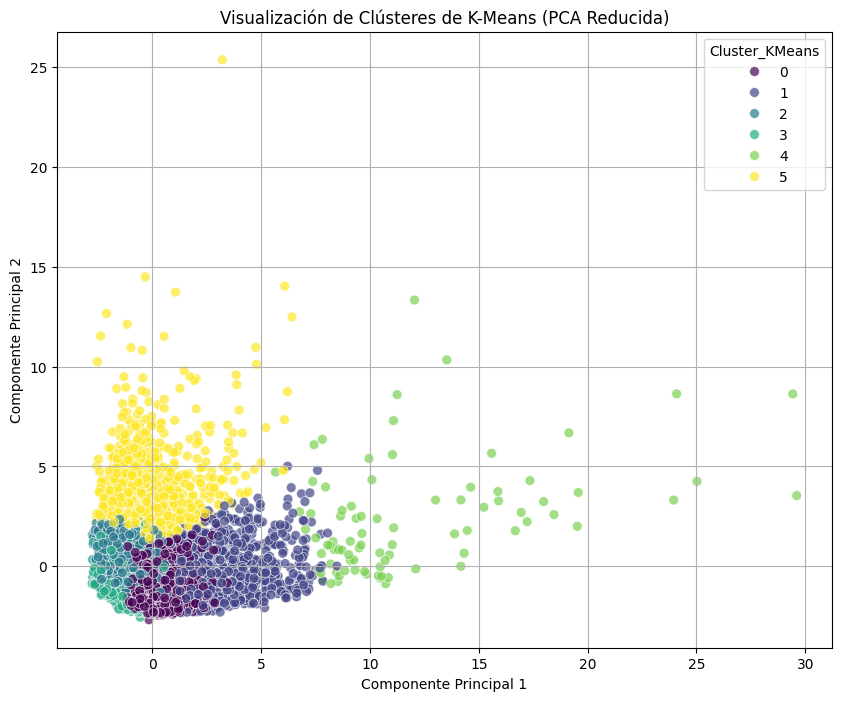

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
# Asegúrate de usar los datos escalados y sin la columna de clúster de K-Means para PCA
data_for_pca = df_scaled.drop('Cluster_KMeans', axis=1)
df_pca = pca.fit_transform(data_for_pca)

# Crear un DataFrame con los componentes principales y las etiquetas de clúster de K-Means
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_KMeans'] = df_scaled['Cluster_KMeans']

# Visualizar los clústeres de K-Means
plt.figure(figsize=(10, 8))
# Usar un colormap que funcione bien para el número de clústeres de K-Means
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_KMeans', palette='viridis', legend='full', s=50, alpha=0.7)
plt.title('Visualización de Clústeres de K-Means (PCA Reducida)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [19]:
# Contar la cantidad de clientes en cada clúster de K-Means
df['Cluster_KMeans'] = kmeans_model.labels_
cluster_counts_kmeans = df.groupby('Cluster_KMeans').size().reset_index(name='Count')
display(cluster_counts_kmeans)

,Cluster_KMeans,Count
0,0,2228
1,1,1319
2,2,3036
3,3,1311
4,4,86
5,5,970


## Perfiles Detallados de Clientes (Clústeres K-Means)

Aquí presentamos perfiles más detallados para cada uno de los 6 clústeres identificados por K-Means, incluyendo la cantidad de clientes, el balance promedio y el promedio de tenencia (TENURE):

### Clúster 0: Compradores Frecuentes a Plazos
*   **Cantidad de Clientes:** 2228
*   **Balance Promedio:** 737.74
*   **TENURE Promedio:** 11.48
*   **Características Principales:** Clientes con saldo y límite de crédito moderados. Realizan compras frecuentes, principalmente a plazos (promedio de Installments Purchases: 674.69). No utilizan mucho los anticipos en efectivo y gestionan sus pagos de forma consistente, aunque rara vez pagan el total (promedio PRC_FULL_PAYMENT: 0.25).

### Clúster 1: Compradores de Alto Gasto (Variado)
*   **Cantidad de Clientes:** 1319
*   **Balance Promedio:** 1847.84
*   **TENURE Promedio:** 11.88
*   **Características Principales:** Clientes con saldo y límite de crédito altos (promedio CREDIT_LIMIT: 6994.01). Realizan un alto volumen de compras (promedio PURCHASES: 2971.56), tanto únicas (promedio ONEOFF_PURCHASES: 2040.43) como a plazos (promedio INSTALLMENTS_PURCHASES: 931.58), con alta frecuencia. Tienen tenure alto y realizan pagos elevados (promedio PAYMENTS: 2812.54). No son usuarios frecuentes de anticipos en efectivo.

### Clúster 2: Usuarios de Anticipos en Efectivo (Bajo Gasto)
*   **Cantidad de Clientes:** 3036
*   **Balance Promedio:** 1533.67
*   **TENURE Promedio:** 11.51
*   **Características Principales:** Clientes con saldo moderado pero bajo volumen de compras (promedio PURCHASES: 266.71). Utilizan anticipos en efectivo con moderada frecuencia (promedio CASH_ADVANCE_FREQUENCY: 0.16) y realizan pagos bajos (promedio PAYMENTS: 972.58), rara vez pagando el total (promedio PRC_FULL_PAYMENT: 0.02). Podrían estar usando la tarjeta principalmente para obtener efectivo.

### Clúster 3: Clientes de Baja Actividad
*   **Cantidad de Clientes:** 1311
*   **Balance Promedio:** 112.01
*   **TENURE Promedio:** 11.30
*   **Características Principales:** Clientes con saldo muy bajo y actividad de compra limitada (promedio PURCHASES: 334.65). Utilizan muy poco los anticipos en efectivo y tienen pagos mínimos bajos (promedio MINIMUM_PAYMENTS: 267.55). Tienden a pagar el total con moderada frecuencia. Son usuarios con baja interacción con el crédito.

### Clúster 4: Clientes Premium de Alto Gasto
*   **Cantidad de Clientes:** 86
*   **Balance Promedio:** 4541.39
*   **TENURE Promedio:** 11.97
*   **Características Principales:** Clientes con saldo y límite de crédito muy altos (promedio CREDIT_LIMIT: 12493.02). Realizan un volumen de compras extremadamente alto (promedio PURCHASES: 15777.31), tanto únicas como a plazos, con alta frecuencia. Realizan pagos muy elevados (promedio PAYMENTS: 15581.50) y tienen una alta tendencia a pagar el total (promedio PRC_FULL_PAYMENT: 0.39). Son los clientes más valiosos y establecidos.

### Clúster 5: Usuarios Intensivos de Anticipos en Efectivo
*   **Cantidad de Clientes:** 970
*   **Balance Promedio:** 4873.64
*   **TENURE Promedio:** 11.40
*   **Características Principales:** Clientes con saldo alto y bajo volumen de compras (promedio PURCHASES: 555.03). Dependen significativamente de los anticipos en efectivo (promedio CASH_ADVANCE: 5052.50). Tienen límites de crédito altos y realizan pagos elevados, pero rara vez pagan el total (promedio PRC_FULL_PAYMENT: 0.04). Utilizan el crédito principalmente para acceso a efectivo.

In [20]:
# @title
# Añadir las etiquetas de clúster al DataFrame original
df['Cluster_KMeans'] = kmeans_model.labels_

# Calcular los promedios por clúster en el DataFrame original
cluster_means_original = df.groupby('Cluster_KMeans').mean()
display(cluster_means_original)

# Puedes seguir mostrando los promedios en el DataFrame escalado si lo necesitas para alguna comparación
# cluster_means_scaled = df_scaled.groupby('Cluster_KMeans').mean()
# display(cluster_means_scaled)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_KMeans,,,,,,,,,,,,,,,,,
0,737.735642,0.950290,859.739237,185.586773,674.688048,212.512364,0.878294,0.090127,0.818109,0.042911,0.813285,17.766158,3296.530611,1006.531014,733.581027,0.253815,11.480251
1,1847.841923,0.978407,2971.556861,2040.433518,931.578234,327.704395,0.926738,0.751228,0.579309,0.053624,1.062168,44.027293,6994.008546,2812.541757,804.260011,0.280730,11.880212
2,1533.674992,0.965369,266.713126,221.970102,44.906028,798.268894,0.159240,0.102629,0.058478,0.160703,3.039526,3.026021,3272.584541,972.578890,791.951209,0.021804,11.507905
3,112.010683,0.374715,334.650862,208.928002,125.949252,335.263311,0.265886,0.077474,0.179927,0.038210,0.807018,4.134249,3734.350796,1093.446581,267.549557,0.230283,11.296720
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
5,4873.637162,0.966706,555.034670,340.652680,214.486804,5052.500877,0.306788,0.145926,0.200234,0.513280,15.794845,8.447423,7989.540769,3951.625872,2054.974824,0.039092,11.396907


In [21]:
df_scaled.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster_KMeans'],
      dtype='object')

In [22]:
df_scaled.drop('Cluster_KMeans', axis=1, inplace=True)

## 2. Autoencoder con Keras

Este proyecto implementa un **autoencoder** utilizando `TensorFlow/Keras` para reducir y reconstruir datos de entrada.

## 🎯 Objetivo
- Reducir la dimensionalidad de datos de **17 variables** a un espacio comprimido de **10 dimensiones**.
- Reconstruir la entrada original a partir de la representación comprimida.

## ⚙️ Arquitectura
- **Entrada**: vector de 17 características.
- **Encoder**:
  - Compresión inicial a 7 neuronas.
  - Varias capas densas (500 → 2000 neuronas).
  - Representación final en 10 dimensiones (`encoded`).
- **Decoder**:
  - Expansión progresiva (2000 → 500).
  - Capa final de 17 neuronas para reconstrucción.

## 🧩 Modelos
- **Autoencoder**: de entrada → reconstrucción.
- **Encoder**: de entrada → representación comprimida.

## 🔧 Entrenamiento
- Optimizador: `Adam`
- Función de pérdida: `Mean Squared Error (MSE)`

In [23]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [24]:
df_scaled.shape

(8950, 17)

In [25]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,653 (8.80 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.7169
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.3204
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.2551
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.2009
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1791
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.1535
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.1482
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1394
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.1267
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.1195
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.1084
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1005
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0952
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0938
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0987
Epoc

In [27]:
autoencoder.save_weights('autoencoder.weights.h5')

In [28]:
pred = encoder.predict(df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [29]:
pred.shape

(8950, 10)

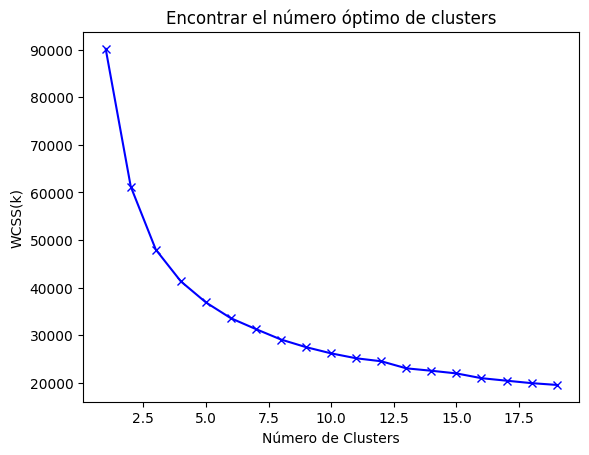

In [30]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

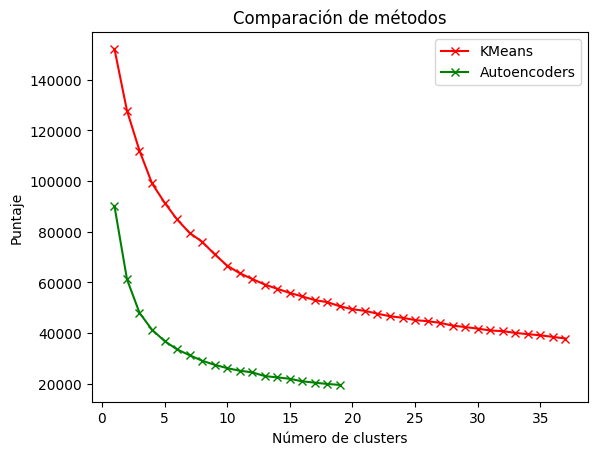

In [31]:
plt.plot(k_range, inertia, 'bx-', color="r", label="KMeans")
plt.plot(range_values, scores_2, 'bx-', color="g", label="Autoencoders")

plt.legend()  # muestra la leyenda
plt.xlabel("Número de clusters")
plt.ylabel("Puntaje")
plt.title("Comparación de métodos")
plt.show()



In [32]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)


In [33]:
df_cluster_dr = pd.concat([df_scaled, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,3
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,3
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,3
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,3


In [34]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.974630,0.101122
1,-0.129537,-1.798774
2,-0.962009,0.973068
3,-0.894888,-0.267322
4,-2.228381,0.171728


In [35]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.974630,0.101122,3
1,-0.129537,-1.798774,3
2,-0.962009,0.973068,3
3,-0.894888,-0.267322,3
4,-2.228381,0.171728,3
...,...,...,...
8945,-1.382763,1.216610,3
8946,-2.218376,0.708783,3
8947,-1.806450,0.855790,3
8948,-2.468261,0.036977,3


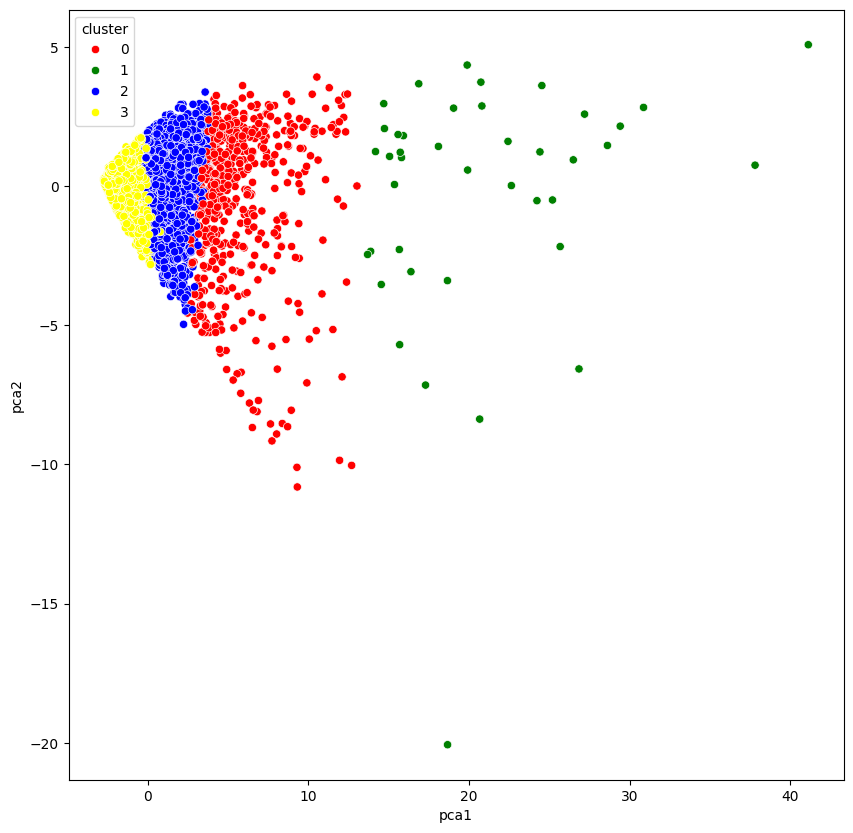

In [36]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

In [36]:
s